<a href="https://colab.research.google.com/github/rjmon88/AnaliseESCI/blob/main/AnaliseEsci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gdown
#https://drive.google.com/file/d/1C9c063SNgicYdaLFnu7NkNkkF4X8laQ_/view?usp=sharing
target_url = 'https://drive.google.com/uc?id=1C9c063SNgicYdaLFnu7NkNkkF4X8laQ_'
gdown.download(target_url,'data.csv',quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1C9c063SNgicYdaLFnu7NkNkkF4X8laQ_
To: /content/data.csv
100%|██████████| 151M/151M [00:03<00:00, 43.8MB/s]


'data.csv'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
df = pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257173 entries, 0 to 257172
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   numg_processo                  257173 non-null  int64  
 1   codg_protocolo                 257173 non-null  object 
 2   data_protocolo                 257173 non-null  object 
 3   numg_protocolista              1294 non-null    float64
 4   numg_edificacao                257173 non-null  int64  
 5   data_encerramento              229298 non-null  object 
 6   codg_tipo_processo             257173 non-null  object 
 7   codg_subtipo_processo          257173 non-null  object 
 8   data_homologacao               229298 non-null  object 
 9   data_solicitacao               257173 non-null  object 
 10  flag_excluido                  257173 non-null  bool   
 11  flag_deferido                  229298 non-null  object 
 12  numg_processo_versao_anterior 

In [ ]:
df


,numg_processo,codg_protocolo,data_protocolo,numg_protocolista,numg_edificacao,data_encerramento,codg_tipo_processo,codg_subtipo_processo,data_homologacao,data_solicitacao,flag_excluido,flag_deferido,numg_processo_versao_anterior,numg_processo_retorno,numg_homologador,flag_homologado,numg_solicitante,numg_obm,desc_outras_observacoes,desc_parecer,codg_finalidade,codg_complexidade,numg_tipo_deferimento,numr_area_total_solicitacao
0,230567,H8167000216A,2021-10-18 16:38:04.000,NaN,99279,2021-10-18 16:38:05.000,HAB,HABITESE,2019-09-12 03:00:00.000,2021-10-18 16:38:04.000,False,True,230554.0,NaN,1248.0,True,1248,745,NaN,NaN,VIST_APROVADO_SIGAT,BAIXA_COMPLEXIDADE_ENTRE_200M2_750M2,1.0,604.75
1,197480,F8379000861A,2021-09-15 08:40:03.000,NaN,24062,2021-10-18 18:20:52.000,FUN,FUNCIONAMENTO_VISTORIA,2021-10-18 18:20:52.000,2021-09-15 08:40:03.000,False,True,NaN,NaN,23524.0,True,22583,296,NaN,NaN,VISTORIA_EXOFFICIO,ALTA_COMPLEXIDADE,1.0,0.00
2,231027,H8081003285A,2021-10-19 07:30:15.000,NaN,52546,2021-10-19 07:30:16.000,HAB,HABITESE,2018-10-09 03:00:00.000,2021-10-19 07:30:15.000,False,True,231026.0,NaN,27949.0,True,27949,215,NaN,NaN,VIST_APROVADO_SIGAT,BAIXA_COMPLEXIDADE_ATE_200M2,1.0,190.00
3,190984,H8093000268A,2021-09-08 13:50:25.000,NaN,84701,2021-09-08 13:50:26.000,HAB,HABITESE,2014-09-16 03:00:00.000,2021-09-08 13:50:25.000,False,True,190982.0,NaN,922.0,True,922,14,NaN,NaN,VIST_APROVADO_SIGAT,BAIXA_COMPLEXIDADE_ATE_200M2,1.0,182.28
4,157653,H8047000661A,2021-08-03 17:51:05.000,NaN,72376,2021-09-08 13:50:32.000,HAB,HABITESE,2021-09-08 13:50:32.000,2021-08-03 17:51:05.000,False,False,156879.0,NaN,1080.0,True,1865,15,Obs: *Edificação não faz uso de gás;\n *...,1. Instalar corrimão em ambos os lados da esca...,VIST_HABITESE,BAIXA_COMPLEXIDADE_ENTRE_200M2_750M2,2.0,601.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257168,262482,A8051000075A,2021-11-16 14:18:31.000,NaN,110601,2021-11-16 14:18:33.000,PRO,ANALISE_PROJETO,2017-09-05 03:00:00.000,2021-11-16 14:18:31.000,False,True,NaN,NaN,30003.0,True,30003,344,NaN,NaN,PPCI_APROVADO_SIGAT,BAIXA_COMPLEXIDADE_ENTRE_200M2_750M2,1.0,1357.77
257169,262483,A8105003001A,2021-11-16 14:18:46.000,NaN,110130,NaN,PRO,ANALISE_PROJETO,NaN,2021-11-16 14:18:46.000,False,NaN,261907.0,NaN,NaN,False,6338,427,NaN,NaN,PPCI_SUBSTITUICAO,ALTA_COMPLEXIDADE,NaN,3390.75
257170,262484,A8093001155A,2021-11-16 14:18:59.000,NaN,110616,2021-11-16 14:19:00.000,PRO,ANALISE_PROJETO,2014-11-11 02:00:00.000,2021-11-16 14:18:59.000,False,True,NaN,NaN,37786.0,True,37786,439,NaN,NaN,PPCI_APROVADO_SIGAT,ALTA_COMPLEXIDADE,1.0,8208.93
257171,262488,H8051000017A,2021-11-16 14:20:32.000,NaN,110601,2021-11-16 14:20:33.000,HAB,HABITESE,2019-11-29 03:00:00.000,2021-11-16 14:20:32.000,False,True,262482.0,NaN,30003.0,True,30003,344,NaN,NaN,VIST_APROVADO_SIGAT,BAIXA_COMPLEXIDADE_ENTRE_200M2_750M2,1.0,1357.77


In [ ]:
X=df.loc[:,['codg_protocolo','data_protocolo','data_encerramento','codg_tipo_processo','data_solicitacao', 'flag_deferido','codg_complexidade', 'numr_area_total_solicitacao']]
X

,codg_protocolo,data_protocolo,data_encerramento,codg_tipo_processo,data_solicitacao,flag_deferido,codg_complexidade,numr_area_total_solicitacao
0,H8167000216A,2021-10-18 16:38:04.000,2021-10-18 16:38:05.000,HAB,2021-10-18 16:38:04.000,True,BAIXA_COMPLEXIDADE_ENTRE_200M2_750M2,604.75
1,F8379000861A,2021-09-15 08:40:03.000,2021-10-18 18:20:52.000,FUN,2021-09-15 08:40:03.000,True,ALTA_COMPLEXIDADE,0.00
2,H8081003285A,2021-10-19 07:30:15.000,2021-10-19 07:30:16.000,HAB,2021-10-19 07:30:15.000,True,BAIXA_COMPLEXIDADE_ATE_200M2,190.00
3,H8093000268A,2021-09-08 13:50:25.000,2021-09-08 13:50:26.000,HAB,2021-09-08 13:50:25.000,True,BAIXA_COMPLEXIDADE_ATE_200M2,182.28
4,H8047000661A,2021-08-03 17:51:05.000,2021-09-08 13:50:32.000,HAB,2021-08-03 17:51:05.000,False,BAIXA_COMPLEXIDADE_ENTRE_200M2_750M2,601.22
...,...,...,...,...,...,...,...,...
257168,A8051000075A,2021-11-16 14:18:31.000,2021-11-16 14:18:33.000,PRO,2021-11-16 14:18:31.000,True,BAIXA_COMPLEXIDADE_ENTRE_200M2_750M2,1357.77
257169,A8105003001A,2021-11-16 14:18:46.000,NaN,PRO,2021-11-16 14:18:46.000,NaN,ALTA_COMPLEXIDADE,3390.75
257170,A8093001155A,2021-11-16 14:18:59.000,2021-11-16 14:19:00.000,PRO,2021-11-16 14:18:59.000,True,ALTA_COMPLEXIDADE,8208.93
257171,H8051000017A,2021-11-16 14:20:32.000,2021-11-16 14:20:33.000,HAB,2021-11-16 14:20:32.000,True,BAIXA_COMPLEXIDADE_ENTRE_200M2_750M2,1357.77


In [ ]:
X["data"] = pd.to_datetime(X["data_protocolo"],infer_datetime_format = True).dt.floor('1D')
X

,codg_protocolo,data_protocolo,data_encerramento,codg_tipo_processo,data_solicitacao,flag_deferido,codg_complexidade,numr_area_total_solicitacao,data
0,H8167000216A,2021-10-18 16:38:04.000,2021-10-18 16:38:05.000,HAB,2021-10-18 16:38:04.000,True,BAIXA_COMPLEXIDADE_ENTRE_200M2_750M2,604.75,2021-10-18
1,F8379000861A,2021-09-15 08:40:03.000,2021-10-18 18:20:52.000,FUN,2021-09-15 08:40:03.000,True,ALTA_COMPLEXIDADE,0.00,2021-09-15
2,H8081003285A,2021-10-19 07:30:15.000,2021-10-19 07:30:16.000,HAB,2021-10-19 07:30:15.000,True,BAIXA_COMPLEXIDADE_ATE_200M2,190.00,2021-10-19
3,H8093000268A,2021-09-08 13:50:25.000,2021-09-08 13:50:26.000,HAB,2021-09-08 13:50:25.000,True,BAIXA_COMPLEXIDADE_ATE_200M2,182.28,2021-09-08
4,H8047000661A,2021-08-03 17:51:05.000,2021-09-08 13:50:32.000,HAB,2021-08-03 17:51:05.000,False,BAIXA_COMPLEXIDADE_ENTRE_200M2_750M2,601.22,2021-08-03
...,...,...,...,...,...,...,...,...,...
257168,A8051000075A,2021-11-16 14:18:31.000,2021-11-16 14:18:33.000,PRO,2021-11-16 14:18:31.000,True,BAIXA_COMPLEXIDADE_ENTRE_200M2_750M2,1357.77,2021-11-16
257169,A8105003001A,2021-11-16 14:18:46.000,NaN,PRO,2021-11-16 14:18:46.000,NaN,ALTA_COMPLEXIDADE,3390.75,2021-11-16
257170,A8093001155A,2021-11-16 14:18:59.000,2021-11-16 14:19:00.000,PRO,2021-11-16 14:18:59.000,True,ALTA_COMPLEXIDADE,8208.93,2021-11-16
257171,H8051000017A,2021-11-16 14:20:32.000,2021-11-16 14:20:33.000,HAB,2021-11-16 14:20:32.000,True,BAIXA_COMPLEXIDADE_ENTRE_200M2_750M2,1357.77,2021-11-16


In [ ]:
v = X.groupby(['data', 'codg_tipo_processo']).size().unstack(fill_value=0)
v

codg_tipo_processo,FUN,HAB,PRO
data,,,
2020-05-07,0,124,185
2020-05-08,0,89,116
2020-05-10,0,9,12
2020-05-11,0,55,72
2020-05-12,0,38,59
...,...,...,...
2021-11-14,2,4,11
2021-11-15,25,24,43
2021-11-16,278,145,213


In [ ]:
v.sum(axis=0)

codg_tipo_processo
FUN     68997
HAB     64347
PRO    123829
dtype: int64

In [ ]:
v.describe()

codg_tipo_processo,FUN,HAB,PRO
count,551.000000,551.000000,551.000000
mean,125.221416,116.782214,224.735027
std,224.668406,119.485761,173.955132
min,0.000000,0.000000,0.000000
25%,0.000000,9.000000,26.000000
50%,0.000000,88.000000,244.000000
75%,148.000000,161.500000,329.000000
max,897.000000,489.000000,651.000000


In [ ]:
!pip install calmap

<Figure size 0x0 with 0 Axes>

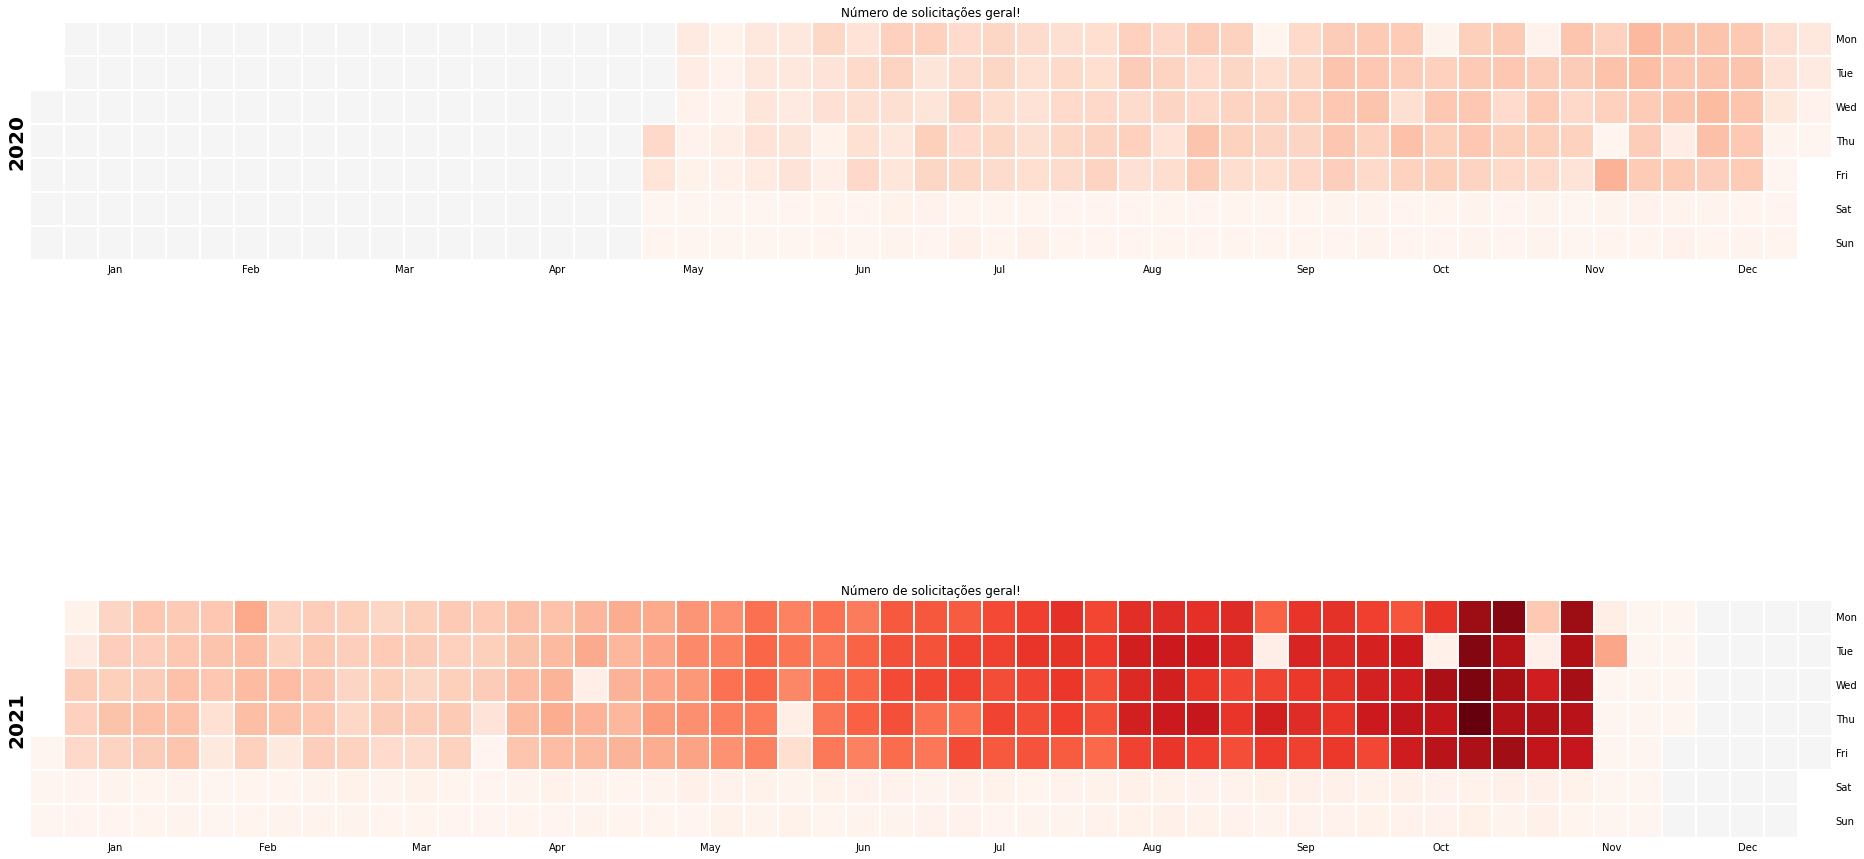

In [ ]:
import matplotlib as mpl
import calmap


# Import Data


# Plot
plt.figure(figsize=(26,20), dpi=0)
calmap.calendarplot(v.sum(axis=1) , fig_kws={'figsize': (26,20)}, yearlabel_kws={'color':'black', 'fontsize':20}, subplot_kws={'title':'Número de solicitações geral!'})
plt.show()

<Figure size 0x0 with 0 Axes>

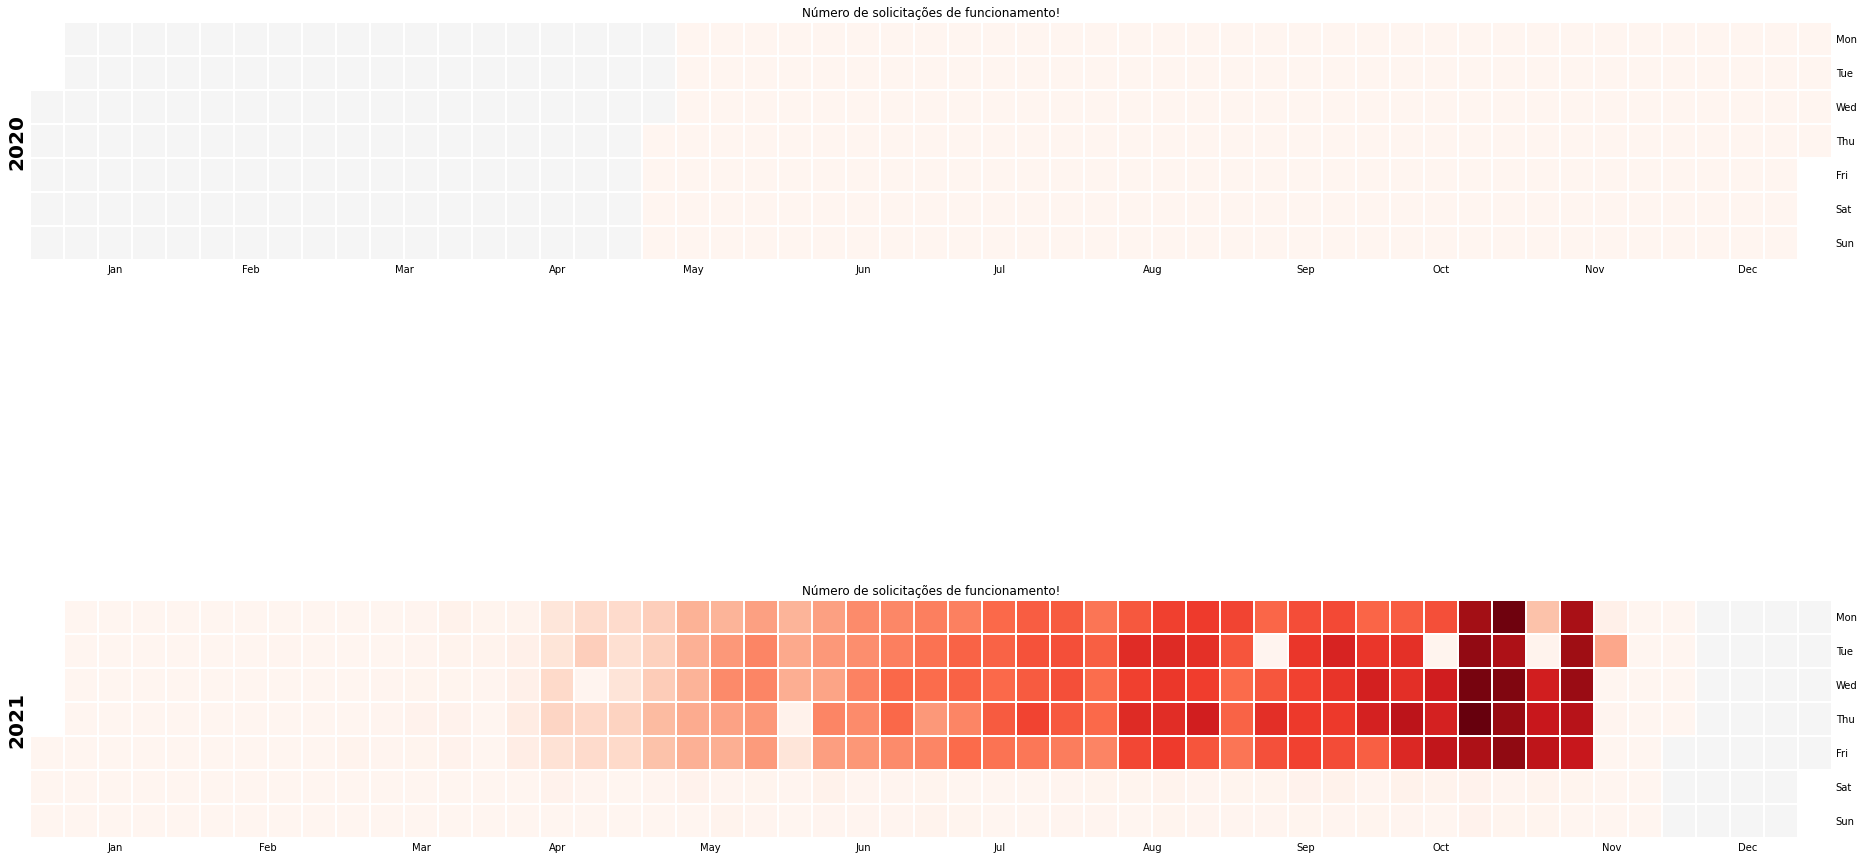

In [ ]:
import matplotlib as mpl
import calmap


# Import Data


# Plot
plt.figure(figsize=(26,20), dpi=0)
calmap.calendarplot(v['FUN'] , fig_kws={'figsize': (26,20)}, yearlabel_kws={'color':'black', 'fontsize':20}, subplot_kws={'title':'Número de solicitações de funcionamento!'})
plt.show()

<Figure size 0x0 with 0 Axes>

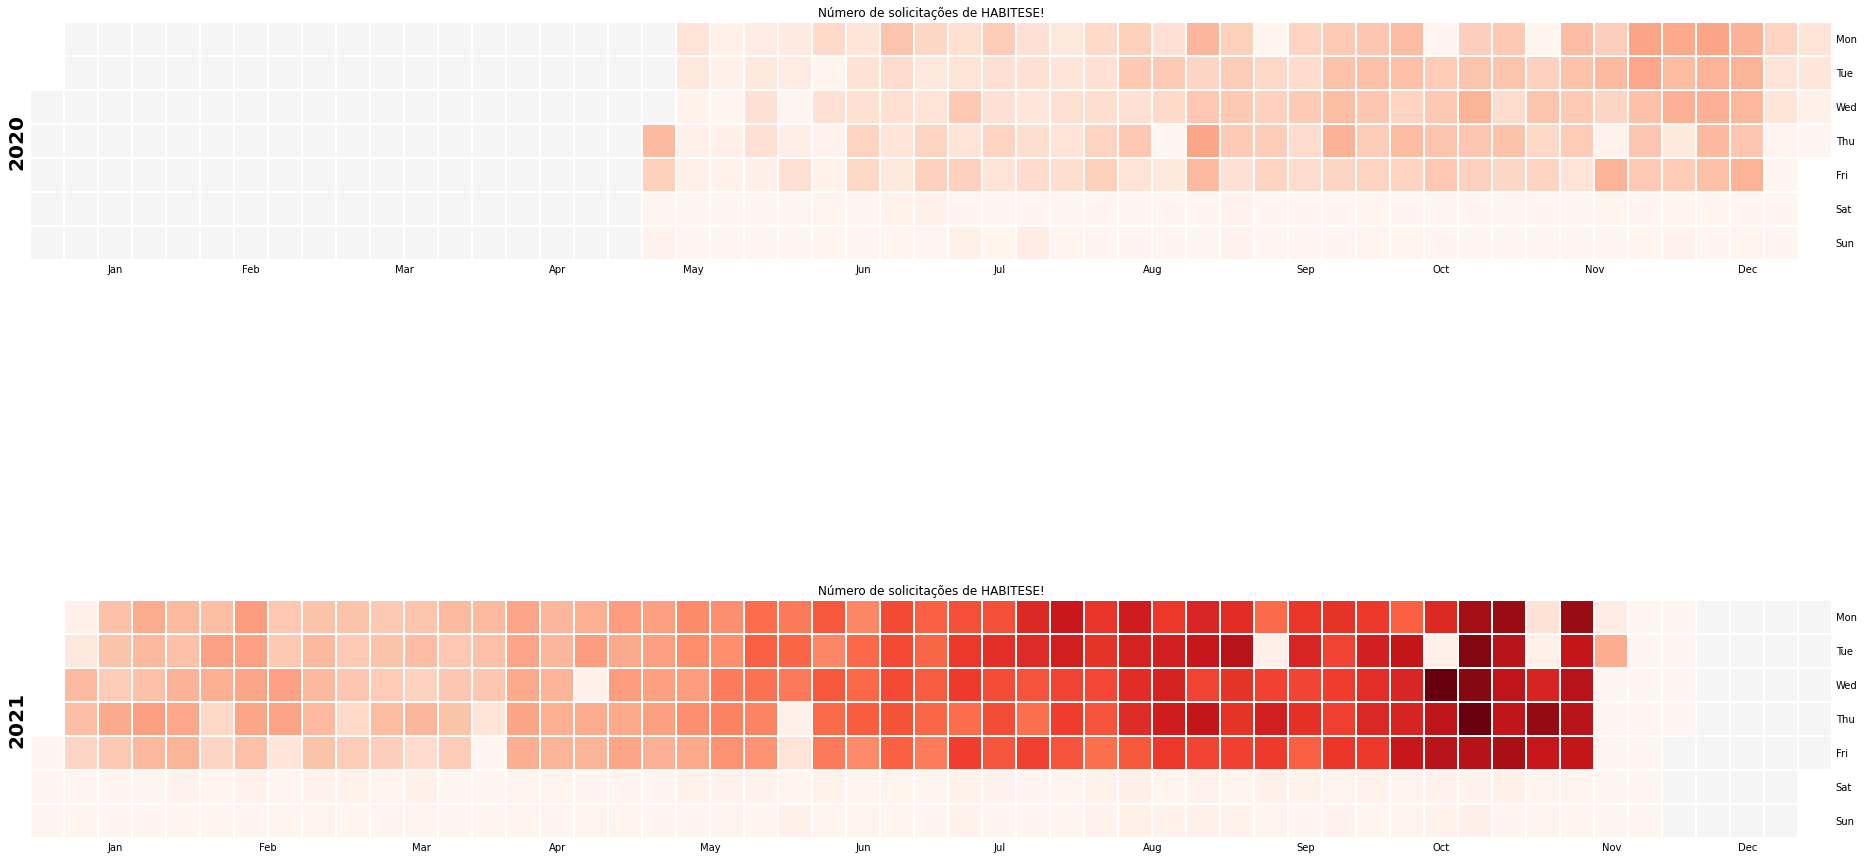

In [ ]:
import matplotlib as mpl
import calmap


# Import Data


# Plot
plt.figure(figsize=(26,20), dpi=0)
calmap.calendarplot(v['HAB'] , fig_kws={'figsize': (26,20)}, yearlabel_kws={'color':'black', 'fontsize':20}, subplot_kws={'title':'Número de solicitações de HABITESE!'})
plt.show()

<Figure size 0x0 with 0 Axes>

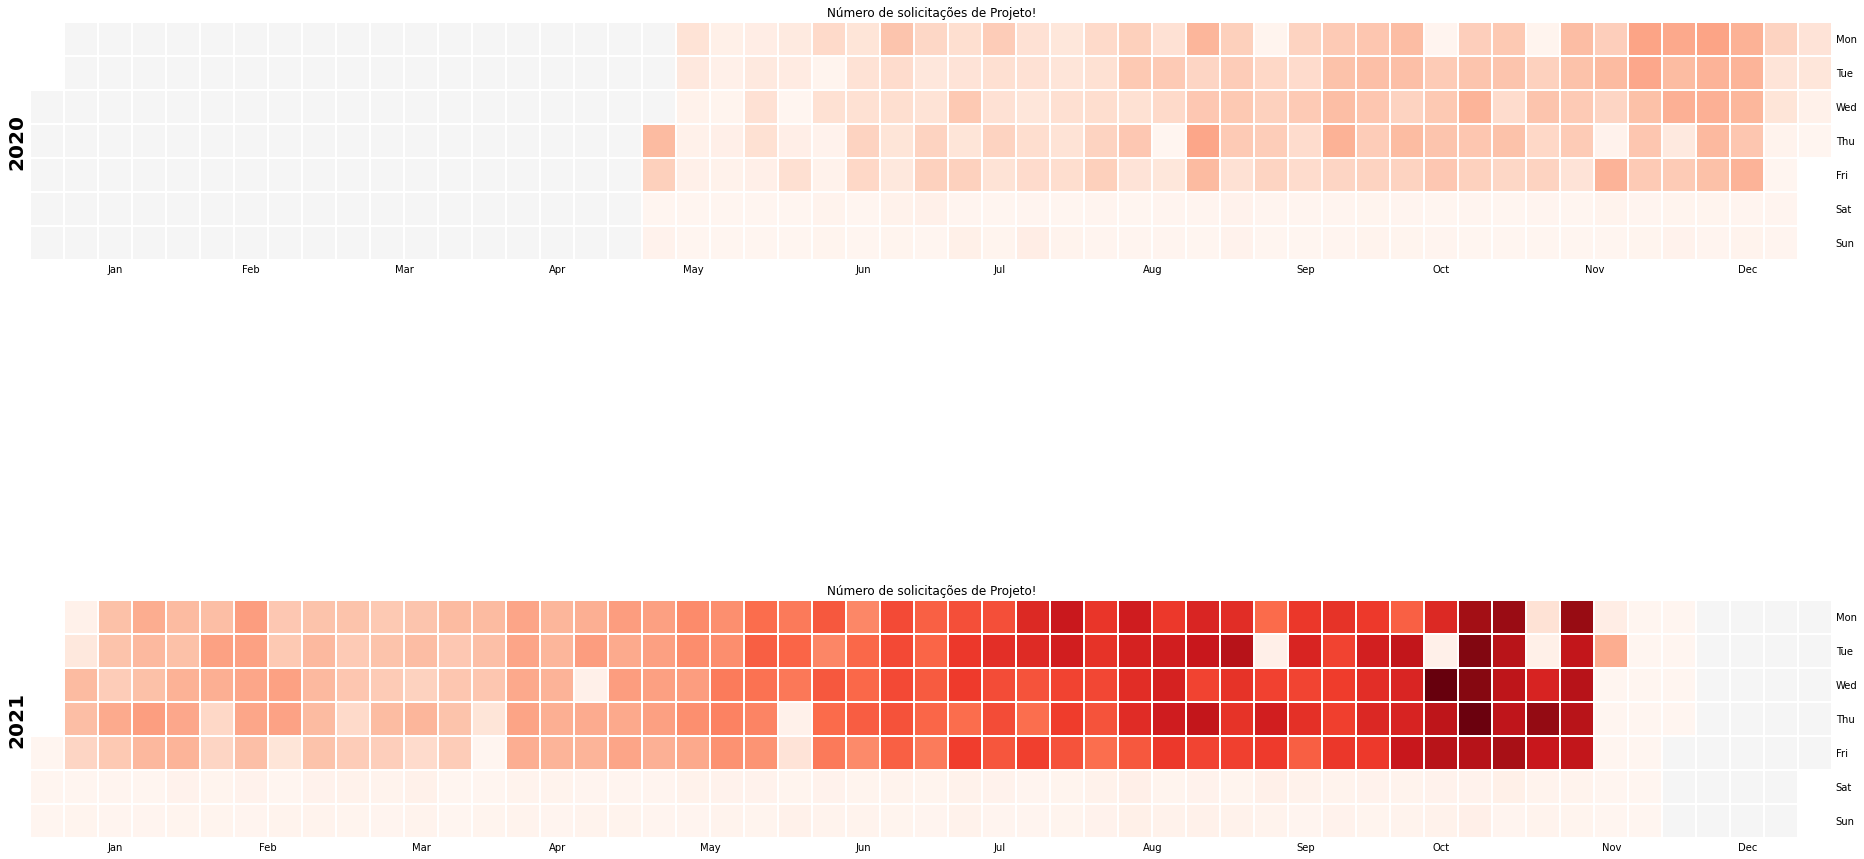

In [ ]:
import matplotlib as mpl
import calmap


# Import Data


# Plot
plt.figure(figsize=(26,20), dpi=0)
calmap.calendarplot(v['HAB'] , fig_kws={'figsize': (26,20)}, yearlabel_kws={'color':'black', 'fontsize':20}, subplot_kws={'title':'Número de solicitações de Projeto!'})
plt.show()

Text(0, 0.5, 'Média deslizante de 7 do número de solicitações.')

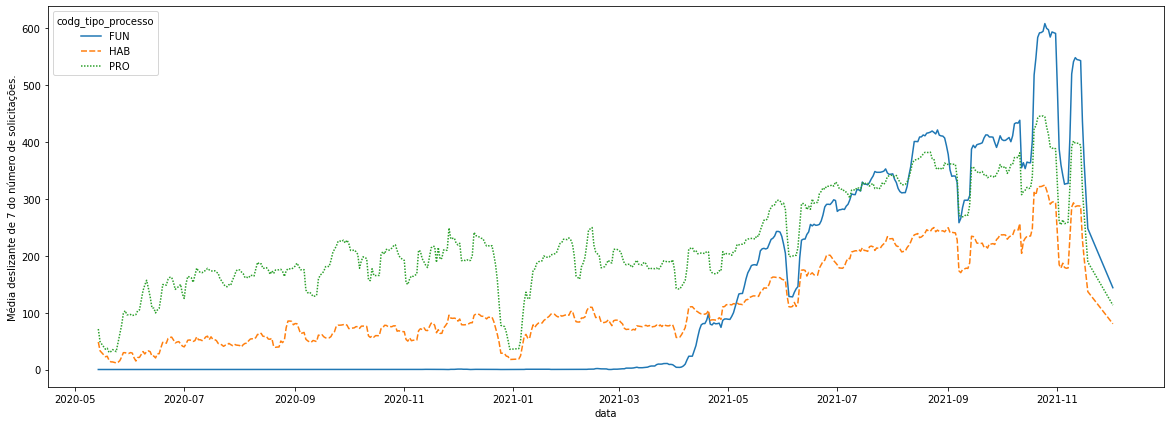

In [ ]:
plt.figure(figsize=(20, 7))
ma = v.rolling(window=7).mean() 
g = sns.lineplot(data = ma)
g.set_ylabel("Média deslizante de 7 do número de solicitações.")

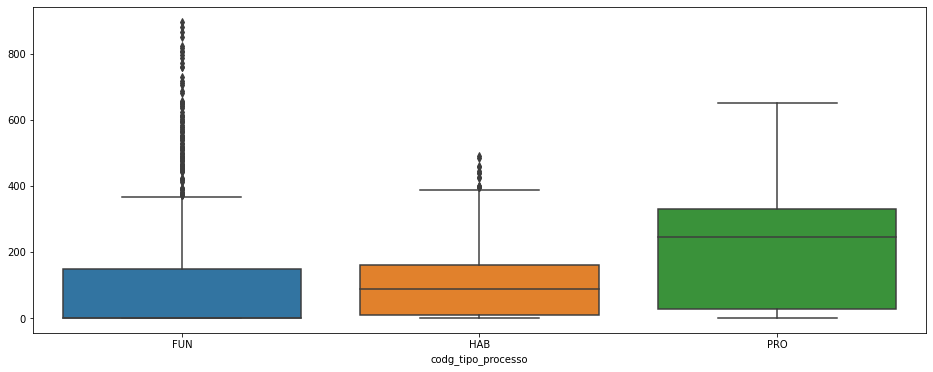

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(data=v)
#ax = sns.swarmplot(data=v, color=".25")